[ 17.21229864  53.15698767  16.122273   ... 344.70470706  98.28969533
   1.28935445]


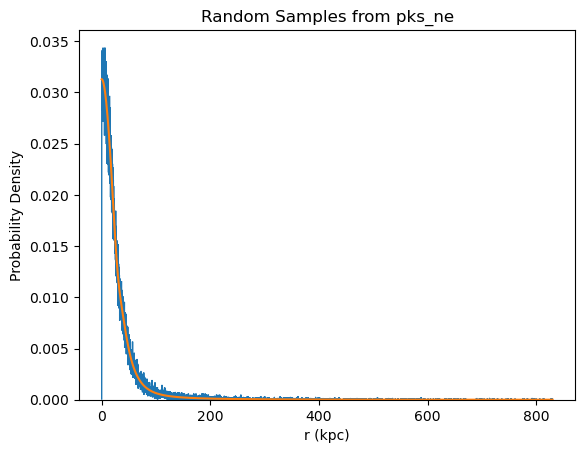

In [19]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.integrate import quad
# ユーザーが定義したpks_ne関数
def pks_ne(r, unitless=False):
    r = r * u.kpc
    n0 = 5.5e-2 * u.cm**-3
    rc = 62 * u.kpc
    beta = 0.572
    if unitless:
        return (n0 * (1 + (r / rc)**2) ** (-3 * beta / 2)).to(u.cm**(-3)).value
    else:
        return (n0 * (1 + (r / rc)**2) ** (-3 * beta / 2)).to(u.cm**(-3))

def per_ne(r):
    ne = ((4.6e-2/(1+(r/55)**2)**1.8) + 4.8e-3/(1+(r/200)**2)**0.87)*(1-0.06*np.exp(-((r-30)/9)**2)*(1+0.04*np.exp(-((r-15)/8)**2)))
    return ne

# 棄却サンプリングを用いた乱数生成
def generate_random_pks_ne(n_samples, r_min, r_max):
    # r_minからr_maxまでの範囲でサンプルを生成
    r_values = np.linspace(r_min, r_max, 1000)
    
    # 確率分布関数の最大値を見つける
    max_p = np.max([pks_ne(r, unitless=True) for r in r_values])
    
    # 乱数を生成して棄却サンプリング
    samples = []
    while len(samples) < n_samples:
        # rの候補を一様分布からサンプリング
        r = np.random.uniform(r_min, r_max)
        
        # 確率を一様分布からサンプリング
        p = np.random.uniform(0, max_p)
        
        # pks_neの確率に基づいてサンプルを棄却するかどうかを決める
        if p < pks_ne(r, unitless=True):
            samples.append(r)
    
    return np.array(samples)

def generate_random_per_ne(n_samples, r_min, r_max):
    # r_minからr_maxまでの範囲でサンプルを生成
    r_values = np.linspace(r_min, r_max, 1000)
    
    # 確率分布関数の最大値を見つける
    max_p = np.max([per_ne(r)**2 for r in r_values])
    
    # 乱数を生成して棄却サンプリング
    samples = []
    while len(samples) < n_samples:
        # rの候補を一様分布からサンプリング
        r = np.random.uniform(r_min, r_max)
        
        # 確率を一様分布からサンプリング
        p = np.random.uniform(0, max_p)
        
        # pks_neの確率に基づいてサンプルを棄却するかどうかを決める
        if p < per_ne(r)**2:
            samples.append(r)
    
    return np.array(samples)

# パラメータ設定
n_samples = 100000
r_min = 0  # kpc
r_max = 830  # kpc

def per_ne_squared(r):
    return per_ne(r)**2

def pks_ne_squared(r):
    return pks_ne(r,True)**2

# 数値積分を行い、積分値を取得
integral_value, _ = quad(per_ne_squared, 0, 830)
integral_value_pks, _ = quad(pks_ne_squared, 0, 1000)

# 規格化定数を計算
normalization_factor = 1 / integral_value
normalization_factor_pks = 1 / integral_value_pks

# 乱数生成
random_samples = generate_random_per_ne(n_samples, r_min, r_max)
print(random_samples)
# 結果をプロット
plt.hist(random_samples, bins=10000,density=True, histtype='step')
plt.xlabel("r (kpc)")
plt.ylabel("Probability Density")
plt.title("Random Samples from pks_ne")
r = np.linspace(0, 830, 1000)
plt.plot(r,per_ne(r)**2*normalization_factor)
plt.show()


[]

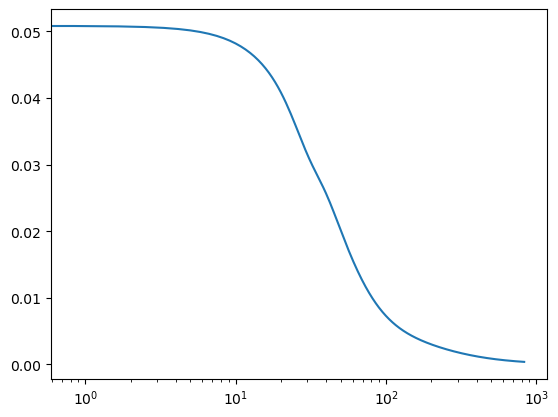

In [21]:
plt.plot(r,per_ne(r))
plt.semilogx()